# 1. Setup Mario

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
env.observation_space.shape

(240, 256, 3)

In [4]:
env.action_space

Discrete(7)

In [5]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [6]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

c:\Users\ASUS\miniconda3\envs\Super_Mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


# 2. Preprocess Environment

In [7]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [8]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim = True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order = 'last')

In [9]:
state = env.reset()

In [10]:
state.shape

(1, 240, 256, 4)

In [11]:
state, reward, done, info = env.step([5])

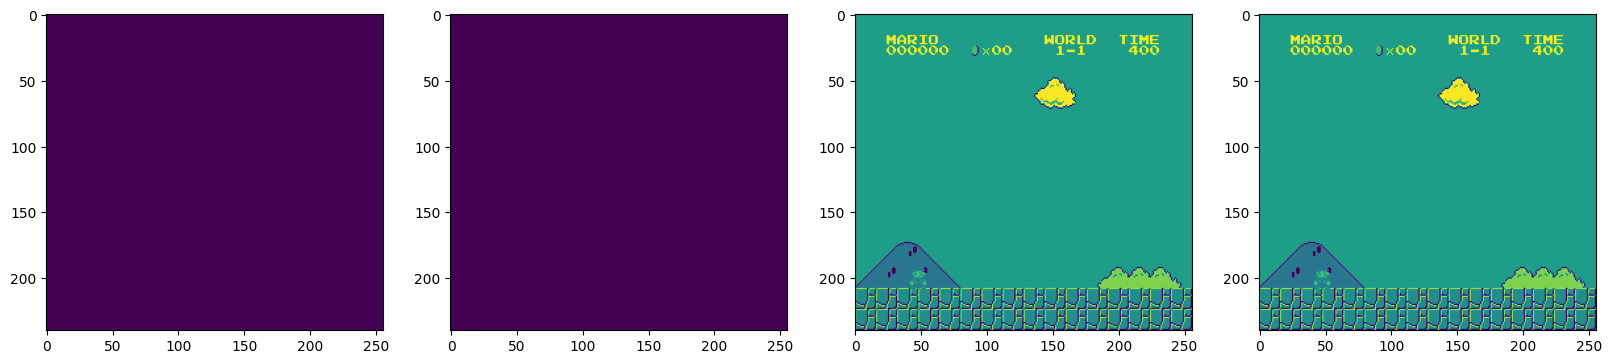

In [12]:
plt.figure(figsize = (20, 16))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx+1)
    plt.imshow(state[0][:, :, idx])
plt.show()

# 3. Train the RL Model

In [13]:
# Import PPO for algorithms
from stable_baselines3 import PPO

In [14]:
LOG_DIR = './logs/'

In [15]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose = 1, tensorboard_log = LOG_DIR, learning_rate = 0.000001, n_steps = 512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [16]:
# Train the AI model, this is where the AI model starts to Learn
model.learn(total_timesteps = 1000000)

Logging to ./logs/PPO_2


c:\Users\ASUS\miniconda3\envs\Super_Mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 8   |
|    iterations      | 1   |
|    time_elapsed    | 59  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 2             |
|    time_elapsed         | 117           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 0.00012636825 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00186       |
|    learning_rate        | 1e-06         |
|    loss                 | 225           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000774     |
|    value_loss           | 502           |
-------------------------------------------
-----

In [17]:
model.save('./Test_Model')

# 4. Test it Out

In [18]:
# Load model
model = PPO.load('./Test_Model', env = env)

Wrapping the env in a VecTransposeImage.


In [19]:
env.observation_space.shape

(240, 256, 4)

In [20]:
state = env.reset()

In [21]:
SIMPLE_MOVEMENT[model.predict(state)[0][0]]

['right', 'A', 'B']

In [22]:
# Start the game
state = env.reset()
# Loop through the game
while True:

    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()